
## <font color='orange'> **PART 1**: OPTIMIZATION</font>

**Problem**: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2. It may be helpful to include a map of these cities (either an existing map or create your own).  

#### 1.1 Optimization Problem: 

Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective value would be measured and how the decision variables would impact it (~200 words). 


### Optimisation Answer
The objective function of this problem is to <b> minimise the total distance travelled (in miles) </b> to distribute the vaccines across the 15 cities. The output of this function (i.e. the total distance travelled) would be quantitative continous because it is numerical and could have numerous values between two numbers. For example, the distance travelled could be 210.125km with decimal values and not just 210km or 211km. 

The decision variable refers to what the algorithm changes in order to reach the objective function. In this case, the decision variable would be the <b> order of cities </b> chosen to travel across the 15 cities.

There could be several constraints to the problem. First, every city must only be visited once. Second, the run time of algorithm should be reasonable so that it delivers the solution fairly quickly (i.e. it doesn't take longer than a couple of minutes).

Practically, the selected route between should be possible to travel through (as there could be paths that are not possible due to infrastructure or the terrain) or the mode of transport (travelling via ship,plane, car, etc. could influence the route). However, in this assignment, we'll simplify and assume that it is possible to travel anywhere in a striaght line with the same speed. This could mean that the permutation of cities that is delivered as the output may not be feasible to travel within the stated distance.

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, required steps, and the termination condition. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

There are several algorithms that could be used to find the optimal solution such as the greedy algorithm, brute-force, hill-climb algorithm, or genetic algorithm. 

An existing problem that is similar to the scenario one is the <b> travelling salesman problem </b> which could be worked on using brute-force algorithm wherein all possible solutions are tried to find the most optimal way. The input is the position of the 15 cities (which gives away their distances with the help of longitudes and latitudes) and the output is the order of the ciites with the minimised distance travelled 

A <b> Genetic Algorithm (GA) is perhaps the best method </b> to solve this optimisation problem. It is faster than brute-force which would derive $15!$ solutions (or, 307,674,368,000,307,674,368,000) and take eternity to find the best solution. Instead, we will run a genetic algorithm with a reasonable number of generations that can run in less than a minute. Also, GA is  more accurate than greedy algorithms (like the hill-climb algorithm). While, GA does not guarantee the global minima like brute-force, it is most likely closer than greedy while ensuring a short run-time.

<b> Disadvantages of GA </b> are that it does not guarantee the best solution and if the hyperparameters (such as the mutation rate) are not set correctly then we would not receive a good solution. The required steps would be to initially find a list of randomly generated solutions in a population, evaluate its fitness (in this case, the total distance travelled in the list of 15 cities) and evaluate if the criteria is met. After that, terminate the algorithm if it is met or generate a mutated list and return to the check fitness step if not met.

Link to flowchart: https://lucid.app/documents/embeddedchart/95570a1e-de31-47a9-949c-bc2ea27fdb94

In [20]:
# top 15 cities in India with the most Covid cases since March 2020 (Sethi, 2021)

import random as random

# name of city = (latitude, longtitude)
agra = (27.1, 77.9)
lucknow = (26.8, 80.8)
pune = (18.5, 73.8)
bengaluru = (12.9, 77.8)
mumbai = (19.0, 72.7)
nagpur = (21.1, 79.0)
chennai = (13.0, 80.0)
delhi = (28.6, 76.8)
indore = (22.7, 75.7)
ahemdabad = (23.0, 72.4)
kolkata = (22.6, 88.0)
hyderabad = (17.4, 78.2)
varanasi = (25.3, 82.9)

loc = [agra, lucknow, pune, bengaluru, mumbai, nagpur, chennai, delhi, indore, ahemdabad, kolkata, hyderabad, varanasi]
# created a list of cities 

# this function generates a n number of lists of cities in a random order 
def population_generator(n): #this function generates a n 
    population = [] 
    for i in range(n):
        chromosome = random.sample(loc, len(loc))
        population.append(chromosome) # this adds the randomised chromosome list to the population list 
    return population 

# this is a function that finds the distance between any two cities using their latitudes and longitudes
# it converts the longitude and latitude values into miles which then gives us the final distance after square rooting  
def distance(city0, city1):
    return (((city0[0] - city1[0]) * 69)**2 + ((city0[1] - city1[1]) * 55)**2)**0.5

# this calculates the total distance covered by paths of all cities across all population lists

def fitness_calculator(population):
    chromosome_dt = [] # an empty list that stores the distance travelled by a chromosome 
    for i in range(len(population)):
        distance_travelled = 0 # resets the distance travelled by each chromosome to avoid double counting
        for y in range(len(loc) - 1): #measures the distance covered by each chromosome; 
            distance_travelled += distance(population[i][y], population[i][y+1]) 
        chromosome_dt.append(distance_travelled)
    return chromosome_dt 

# this function uses the mutation rate parameter to return list of mutated cities 
def mutation(mt, kept_chromosome_city): #mt is the mutation rate
    mutated_cities = []
    for i in range(len(kept_chromosome_city)):
        if random.random() < mt: # sets probability for the occurence of mutation 
            idx0 = random.randint(0, len(kept_chromosome_city[i])-1) #idx0 gives a random number between 0 and 15
            idx1 = random.randint(0, len(kept_chromosome_city[i])-1)
            copy_chromosome_city = kept_chromosome_city[i][:] #copy because we want to preserve original list
            foo = copy_chromosome_city[idx0] # used foo to preserve the value of idx0 value
            copy_chromosome_city[idx0] = copy_chromosome_city[idx1] # switches index 0 city with index 1 city
            copy_chromosome_city[idx1] = foo # switches index 1 city with index 0 city 
            mutated_cities.append(copy_chromosome_city)             
        else:
            mutated_cities.append(kept_chromosome_city[i]) #in case there is no mutation, we keep original chromosome
    return mutated_cities

# the genetic algorithm function which calls all the above functions to finally run the simulation

def genetic_algorithm(generations, initial_population):
    population = population_generator(initial_population) # uses the initial population as parameter
    
    for y in range(generations): # loops the mutation for each generation set in parameter
        chromosome_dt = fitness_calculator(population)
        avg_chromosome_dt = sum(chromosome_dt) / len(chromosome_dt)
        chromosome_dt.sort() 
        chromosome_dt = chromosome_dt[:len(chromosome_dt) // 2]
        kept_chromosome_city = []
        kept_chromosome_dt = []

        # this section removes the chromosomes with greater than average distance travelled
        # we do this to remove the inefficient mutations in the algorithm
        
        for f in range(len(chromosome_dt)):
            if chromosome_dt[f] <= avg_chromosome_dt:
                kept_chromosome_dt.append(chromosome_dt[f])
                kept_chromosome_city.append(population[f])
                
        # the following section is where the mutation occurs
        mutated_cities = mutation(0.1, kept_chromosome_city) #0.1 can be changed to any desirable mutation rate 
        population = mutated_cities + kept_chromosome_city # sets a newer population with original and mutated cities
    print("Minimum distance (in miles) is ", min(chromosome_dt)) 
    
    # used list comprehension to create a new list with the names of the cities x[] from an existing list population[]
    x = [final_loc[coords] for coords in population[chromosome_dt.index(min(chromosome_dt))]]
    print("Order of cities is: ", x)

final_loc = {(27.1, 77.9): 'agra', (26.8, 80.8): 'lucknow', (18.5, 73.8): 'pune',
 (12.9, 77.8): 'bengaluru', (19.0, 72.7): 'mumbai', (21.1, 79.0): 'nagpur',
(13.0, 80.0):'chennai', (28.6, 76.8):'delhi', (22.7, 75.7): 'indore', (23.0, 72.4): 'ahemdabad',
(22.6, 88.0): 'kolkata', (17.4, 78.2): 'hyderabad', (25.3, 82.9): 'varanasi'}

genetic_algorithm(50000, 200)

Minimum distance (in miles) is  6447.157354577218
Order of cities is:  ['bengaluru', 'chennai', 'indore', 'nagpur', 'mumbai', 'delhi', 'hyderabad', 'varanasi', 'lucknow', 'pune', 'kolkata', 'ahemdabad', 'agra']


## <font color='orange'> **PART 2**: SIMULATION</font>


The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Weeks 7 and 8 of CS51. Check out the class readings to learn about this model. 


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.

2. Identify the relevant **variables** of the model, fully classify what type of variables they are, and explain what they mean in the context of your model. Next, identify appropriate numerical values and units for the **initial values** of the variables. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.

3. Explain what the relevant **parameters** ($b$ and $k$) are and what they mean. For your model, identify and justify appropriate numerical values and units for $b$ and $k$. As above, you may include a well-reasoned estimate using empirical data to support your justification. Further, explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors, in the context of the disease you selected, would reduce or increase these parameters.

4. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

<b>Disease</b>: Covid-19 in Lucknow, India (my hometown)

There are <b>four variables</b> dependent variables: $S$, $I$, $R$, and $D$; and one <b>independent variable</b>: time. 'S' refers to the suspectible population (number of people who could become infected. 'I' is the infected population (number of people who are currently infected with Covid-19 and could infect people they come into contact with). 'R' refers to the recovered population (number of people who have recovered from covid and are currently immune from being infected again). 'D' is the deaths caused by covid. All of these variables are quantitative discrete in reality because the number of people is countable and cannot be measured in decimal values. However, for the purpose of computing Euler's equations and derivation, we will assume that these are quantitative continous variable. 

In this model, 'b' is the infection rate which refers to the number of infected people per unit time (in this case, per day). 'k' is the recovery rate, referring to the number of people recovered per day. The fraction of 'k' or 1/k gives the recovery period of the population. Finally, 'l' refers to the death rate i.e. the number of people who die per day. 

In this assignment, the values for b and k has been from the estimates for India (Bagal et al., 2020) because it was difficult to find the rates specifically for Lucknow. For the death rate, I divided the total deaths reported due to covid in India by the total number of people infected.

A smaller b would mean that fewer people are infected per day. As a result, the infected curve would flatten sooner. If b is smaller than k then it would be a strictly decreasing graph (as more poeple would recover than infected per day). However, if b is larger than k, it would lead to spikes of cases. A smaller k would increase the duration of the infection (or the daily number of active covid cases) leading to a greater chance of people being infected if the infected are not quarantined. 

A higher 'l' would mean a higher mortality rate that could be reduced by vaccinations. Birth rates would increase the number of susceptible populations. 

#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify the inputs, outputs, and steps that the algorithm takes, and consider the role of the step size (`h`) in the algorithm. 

The solution to any differential equation containing $dy/dt$ is a function of $y = f(t)$. $f(t)$ would be a solution if $f'(t) = dy/dt$.

In cases where it is difficult to analytically solve for $y$, one can approximate $y$ using Euler's method, an approach to produce a numerical solution. 

Euler's method is an algorithm by iterating through different values of $t$. Considering $dy/dt$, the algorithm generates a solution by iterating through $t_n$ and $t_{n+1} = t_n + \delta t$. $\delta t$ is also known as step size, or in this case, time intervals. $y_{n+1}$ is then calculated as $y_n + \delta y$, and $\delta y = \delta t \times dy/dt$. The algorithm has a starting condition at $(t_0, y_0)$ and iterates through all values of $n$ until $(t_{end}, y_{end})$. 

Using this method, we can solve the SIRD model's differential equations by approximation.

We can use the following differntial equations as inputs:

$dS/dt$, = $-b * S(t) * I$ (1) </br> 
$dI/dt$, = $b * S(t) * I(t) - k * I (t) - l * D(t)(2)$ </br> 
$dR/dt$, =  $k * I(t)$ (3) </br>
$dD/dt$ = $l * I(t) (4)$ </br>

and solve them to find the following functions as outputs:

$S(t)$, $I(t)$, $R(t)$, $D(t)$

The smaller the step size, the more accurate our solution is i.e. the numerical solution would be closer to the analytical solution. 

#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Define a function that implements a numerical simulation to derive the implications of your model using Euler’s method in Python. Your simulation must generate at least one relevant visualization of the disease dynamics (see required analysis below), including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

╒═══════╤═══════════════╤════════════╤═════════════╤═══════════╕
│   Day │   Susceptible │   Infected │   Recovered │      Dead │
╞═══════╪═══════════════╪════════════╪═════════════╪═══════════╡
│     5 │   3.85314e+06 │    2039.8  │     705.555 │   110.873 │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│    50 │   3.84465e+06 │    2424.65 │    7711.04  │  1211.73  │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│   100 │   3.83341e+06 │    2906.54 │   17007.9   │  2672.66  │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│   150 │   3.82007e+06 │    3437.63 │   28079.1   │  4412.43  │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│   180 │   3.81099e+06 │    3773.57 │   35637.4   │  5600.16  │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│   200 │   3.80738e+06 │    4004.17 │   38165.7   │  6454.31  │
├───────┼───────────────┼────────────┼─────────────┼───────────┤
│   250 │   3.79768e+06 │

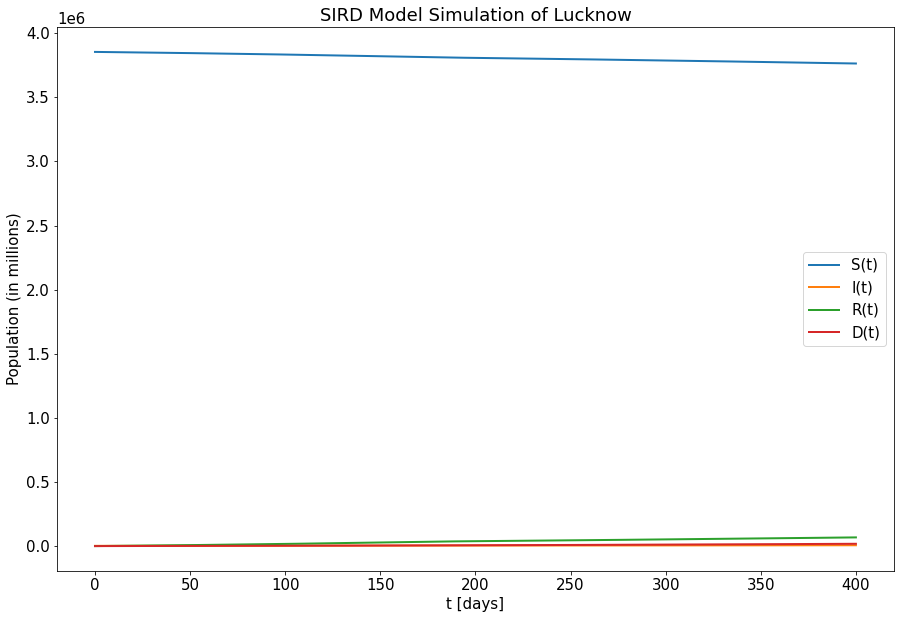

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate 

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]

def SIR_Euler(b,k,l,initial_conds):
    t0 = 0 # start time
    t_end = 400# end time

    h = 1 # step size
    steps = int((t_end - t0)/h + 1) # number of steps

    # variables:
    t = np.linspace(t0, t_end, steps) # storing t values
    S = np.zeros(steps) # for storing S values
    I = np.zeros(steps) # for storing I values
    R = np.zeros(steps) # for storing R values
    D = np.zeros(steps) # for storing D values 
    
    # initial conditions:
    S[0] = initial_conds[0] #here we are including the initial values which would be used later 
    I[0] = initial_conds[1] 
    R[0] = 0
    D[0] = 0    
    
    N = S[0]+I[0]+R[0]-D[0] # to calculate the total living population, we add S, I, and R and remove the D

    for n in range(steps-1): # range(start, stop, step)
        # this defines the equations before 6 months 
        if n < 180:
            S[n+1] = S[n] + h * -(b/N * S[n] * I[n]) 
            I[n+1] = I[n] + h * (b/N * S[n] * I[n] - k * I[n] - l * I[n]) 
            R[n+1] = R[n] + h * (k * I[n])
            D[n+1] = D[n] + h * (l * I[n])  
            
        # implemented a delay differential equation to remove the individuals who have recovered from covid 6 months ago
        # this is because most individuals lose their immunity from being infected after 6 months of infection
        
        
        #this defines the equations after 6 months 
        
        else:
            recovered_180_ago = h * k * I[n-180]
            S[n+1] = S[n] + h * -(b/N * S[n] * I[n]) + recovered_180_ago #people who are susceptible at each step
            I[n+1] = I[n] + h * (b/N * S[n] * I[n] - k * I[n] - l * I[n]) #people who get recovered at each step
            R[n+1] = R[n] + h * (k * I[n]) - recovered_180_ago #people who get recovered at each step
            D[n+1] = D[n] + h * (l * I[n]) #people who die at each step
             
    # draws a figure table with a summary of covid statistics 
    table = [['Day', 'Susceptible', 'Infected', 'Recovered', 'Dead'], 
             [5, S[5], I[5], R[5], D[5]], 
             [50, S[50], I[50], R[50], D[50]],
             [100, S[100], I[100], R[100], D[100]], 
             [150, S[150], I[150], R[150], D[150]],
             [180, S[180], I[180], R[180], D[180]],
             [200, S[200], I[200], R[200], D[200]], 
             [250, S[250], I[250], R[250], D[250]],
             [300, S[300], I[300], R[300], D[300]], 
             [400, S[400], I[400], R[400], D[400]]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid')) 

    #finally displays the table with the first list as the heading with the clearly defined borders with 'fancy_grid'
             
    plt.figure(figsize=(15,10))
    plt.plot(t,S,linewidth=2,label='S(t)') # plots the s(t) line
    plt.plot(t,I,linewidth=2,label='I(t)') # plots the i(t) line
    plt.plot(t,R,linewidth=2,label='R(t)') # plots the r(t) line
    plt.plot(t,D,linewidth=2,label='D(t)') # plots the d(t) line
    plt.xlabel('t [days]') # label for x-axis
    plt.ylabel('Population (in millions)') # label for y-axis
    plt.legend(loc='best') # adds legend to the graph
    plt.title('SIRD Model Simulation of Lucknow') #adds title to the graph
    plt.show() # finally implements the code to visualise the graph

# parameters:
infection_rate = 0.085 # b. infection rate = how many infectious people suseptables interact with
recovery_rate = 0.07 # k. recovery rate = how many days the aveage person takes to recover or die
death_rate = 0.011 # l. death rate = how many infectious people died
 
# death rate has been calculated by dividing total deaths in India (as of March 6) by the total reported infection rates

# initial conditions: 
S0 = 3854000
I0 = 2000 # this is a resonable average daily covid case number in Lucknow 

initial_vals = [S0,I0]

# calling the function to run the simulation
SIR_Euler(b=infection_rate, k=recovery_rate, l=death_rate, initial_conds=initial_vals)

╒═══════╤══════════════════╤════════════╤══════════════════╤════════════╕
│   Day │      Susceptible │   Infected │        Recovered │       Dead │
╞═══════╪══════════════════╪════════════╪══════════════════╪════════════╡
│     5 │      3.84768e+06 │   8757.73  │   2217.68        │    348.493 │
├───────┼──────────────────┼────────────┼──────────────────┼────────────┤
│    50 │      2.50101e+06 │ 688859     │ 578258           │  90869.1   │
├───────┼──────────────────┼────────────┼──────────────────┼────────────┤
│   100 │ 487227           │ 193589     │      2.74658e+06 │ 431605     │
├───────┼──────────────────┼────────────┼──────────────────┼────────────┤
│   150 │ 412742           │   9489.33  │      2.97005e+06 │ 466722     │
├───────┼──────────────────┼────────────┼──────────────────┼────────────┤
│   180 │ 409887           │   1496.93  │      2.97942e+06 │ 468195     │
├───────┼──────────────────┼────────────┼──────────────────┼────────────┤
│   200 │ 434165           │    440.03

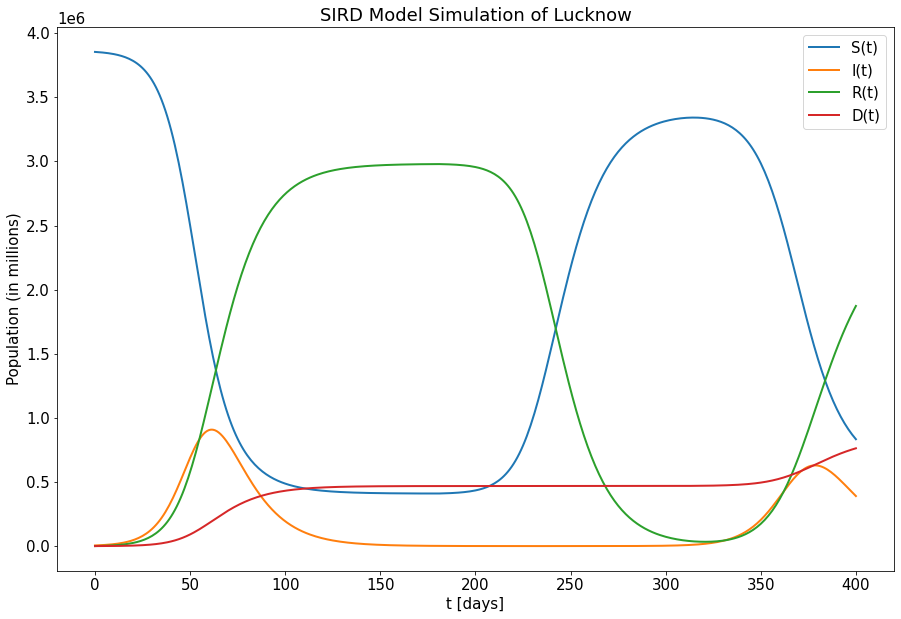

In [17]:
# a higher infection rate

SIR_Euler(b=0.2, k=recovery_rate, l=death_rate, initial_conds=initial_vals)

╒═══════╤═══════════════╤═══════════════╤════════════════╤══════════╕
│   Day │   Susceptible │      Infected │      Recovered │     Dead │
╞═══════╪═══════════════╪═══════════════╪════════════════╪══════════╡
│     5 │   3.85336e+06 │ 908.219       │ 1644.59        │  82.2295 │
├───────┼───────────────┼───────────────┼────────────────┼──────────┤
│    50 │   3.85284e+06 │   0.745143    │ 3011.42        │ 150.571  │
├───────┼───────────────┼───────────────┼────────────────┼──────────┤
│   100 │   3.85284e+06 │   0.000277562 │ 3012.54        │ 150.627  │
├───────┼───────────────┼───────────────┼────────────────┼──────────┤
│   150 │   3.85284e+06 │   1.03391e-07 │ 3012.55        │ 150.627  │
├───────┼───────────────┼───────────────┼────────────────┼──────────┤
│   180 │   3.85284e+06 │   9.06052e-10 │ 3012.55        │ 150.627  │
├───────┼───────────────┼───────────────┼────────────────┼──────────┤
│   200 │   3.85572e+06 │   3.85527e-11 │  128.064       │ 150.627  │
├───────┼───────────

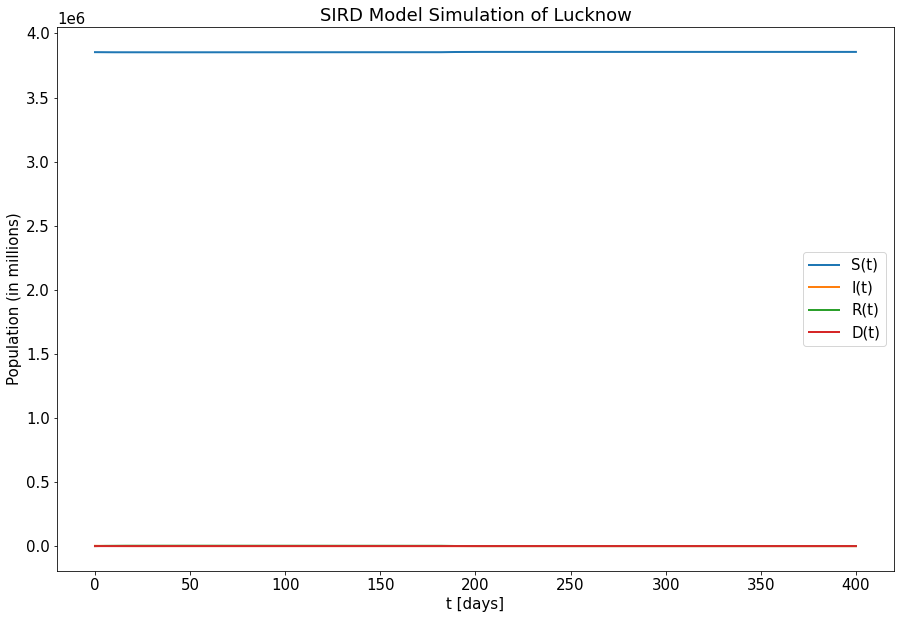

In [23]:
# recovery rate is higher than infection
SIR_Euler(b=infection_rate, k=0.22, l=death_rate, initial_conds=initial_vals)

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should re-run the simulation above multiple times with varying parameter inputs ($b$ and $k$) and observe the behavior of your model. Include at least two additional visualizations here to support your answer. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 2.1.1.3 above)?  

- *Optional*: include at least one multidimensional phase space plot and provide a full interpretation of what it shows.

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


<font color='orange'>**Answer 2.1.4 here**</font>

First visualisation: Considering Lucknow's population of almost 4 million, even when there are $200,000$ cases, we can barely see the rise in cases on the graph. This is also because the recovery rate (0.085) is very marginally higher than the infection rate (0.07) which combined with the death rate (0.11) is not enough to be significant on the graph. This could be because there are not enough people who are infecting others (possibly due to covid protocols such as masks, contact tracing, social distancing, and quarantine).

Second visualisation: Reflects the difference when the infectious rate is increased. We can see two waves of Covid-19 within the 400 days of visualisation in this graph. From day 50 to 100, we see the first wave with increasing covid-19 infections. Then after the six months, the infected population becomes suspectible again. So, we see a rise in the susceptible population around day 200 to 250. Finally, we can see a second wave around the end of the graph between day 350 and 400. This can be a realistic scenario when covid protocols are not followed or there is a new, more infectious variant of the virus. 

Third visualisation: similar to the first one with higher recovery rate. It shows a significantly lower deaths. This could be the result of great medical care at hospitals, high vaccination rates, and if its just the young populations being infected from the virus. 

The main limitation of this model is that the number of Covid-19 in India are severaly underreported. This model relies on the reported cases and India has some of the highest test-per capita rates in the world. 

### **Part 2.2 Agent-Based Modeling and Simulation (*OPTIONAL*)**

This part of the assignment is optional and will only be scored if completed effectively (score of 4 or 5). It is a valuable chance to compare the simulation above with the agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). 

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 *Optional*: Simulation Comparison (~250 words) [#modeling]

After fully exploring the NetLogo model and running multiple simulations, summarize how it compares to your Python SIR simulation above. Aim to identify the main similarities, the major differences, and at least advantage for each one. Comment on which you believe to be a more realistic representation of nature, justifying your reasoning.



<font color='orange'>**Answer 2.2.1 here**</font>

#### 2.2.2 *Optional challenge*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [15]:
# Add code to complete the optional implementation 
# Add more cells as needed to explain your work

## <font color='orange'>**REFLECTION**</font>

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

This unit has been extremely inspiring and eye-opening for me. I realised the power of modelling, algorithms, and simulations, as I could visualise complex real-world phenomenon such as the spread of the pandemic and creating an algorithm that could show the most accurate way to travel between cities. I realised how these models can be constructed using mathematical equations such as Euler's method and run using code.

## <font color='orange'>**References**</font>

Bagal, D. K., Rath, A., Barua, A., & Patnaik, D. (2020). Estimating the parameters of susceptible-infected-recovered model of COVID-19 cases in India during lockdown periods. Chaos, Solitons & Fractals, 140, 110154. https://doi.org/10.1016/j.chaos.2020.110154COVID-19: 

These are the most affected cities in India with the highest number of cases. (n.d.). Business Insider. https://www.businessinsider.in/india/news/these-are-the-most-affected-cities-in-india-with-the-highest-number-of-cases-after-covid-19-second-wave/slidelist/82082660.cms

How Long Will Your Coronavirus Vaccination Last? (n.d.). Yale Medicine. Retrieved March 8, 2022, from https://www.yalemedicine.org/news/how-long-will-coronavirus-vaccine-last#:~:text=Pfizer%20and%20Moderna%20have%20been

How much distance does a degree, minute, and second cover on your maps? | U.S. Geological Survey. (n.d.). Www.usgs.gov. Retrieved March 8, 2022, from https://www.usgs.gov/faqs/how-much-distance-does-degree-minute-and-second-cover-your-maps#:~:text=One%20degree%20of%20latitude%20equals

SIR Model, Part 5. (n.d.). Services.math.duke.edu. https://services.math.duke.edu/education/postcalc/sir/sir5.html

Wikipedia Contributors. (2019, January 26). Delay differential equation. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Delay_differential_equation

## <font color='orange'>**Acknowledgements**</font>

I want to acknowledge the support of Irhum Shafkat (M24; S^4 Peer Tutor) and Amos Decker (M25) with the code for SIRD model with delay differential equations and the genetic algorithm, respectively. They helped me correct my code and showed me the correct way to implement the ambitious ideas I had for my algorithm.

## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.